In [ ]:
! sudo apt-get update
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-extra cm-super

In [3]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\RequirePackage[libertine]{newtxmath}'] 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999

Setting rcParams['ps.usedistiller'] to 'xpdf' requires xpdf.


In [4]:
purples5 = sns.color_palette("Purples_r", 5)
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 5)

In [28]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
masterdata = pd.read_csv("/content/gdrive/MyDrive/GMCDE/experiments/distribution/DistrAC/2022-01-08-21-16_DistrAC_scala/DistrAC_scala.csv")

In [30]:
data_u = pd.read_csv("/content/gdrive/MyDrive/GMCDE/experiments/distribution/DistrAC/2022-01-08-21-16_DistrAC_scala/i_scala.csv")
data_l = pd.read_csv("/content/gdrive/MyDrive/GMCDE/experiments/distribution/DistrAC/2022-01-08-21-16_DistrAC_scala/l_scala.csv")
data_l_noise = pd.read_csv("/content/gdrive/MyDrive/GMCDE/experiments/distribution/DistrAC/2022-01-08-21-16_DistrAC_scala/l_noise_scala.csv")

In [31]:
masterdata["genId"].unique()

array(['independent-i-2-0.0-gaussian-0', 'linear-l-2-0.5-gaussian-0'],
      dtype=object)

In [32]:
masterdata["iteration_num"].unique()

array([   5,   10,   20,   30,   40,   50,   60,   70,   80,   90,  100,
        150,  200,  500, 1000])

In [33]:
masterdata["noise"].unique()

array([0. , 0.5])

In [34]:
masterdata["genId"] = [x.split("-")[1] for x in masterdata["genId"]]

In [35]:
masterdata.head(10)

,genId,iteration_num,noise,rep,contrast
0,i,5,0.0,313,0.224317
1,i,5,0.0,8126,0.227686
2,i,5,0.0,1,0.676142
3,i,5,0.0,7657,0.743426
4,i,5,0.0,938,0.744918
5,i,5,0.0,3438,0.381943
6,i,5,0.0,1094,0.479186
7,i,5,0.0,7501,0.549107
8,i,5,0.0,7188,0.057373
9,i,5,0.0,4532,0.665848


In [36]:
pretty_names = {
    "i": "Uniform, 10 dimensional",
    "l": "Linear, 10 dimensional",
}

In [37]:
%matplotlib inline

In [38]:
def get_nth_iteration(genId,noise,n):
  return (masterdata[(masterdata["genId"] == genId) & (masterdata["noise"] == noise) & (masterdata["iteration_num"] == n)]["contrast"]).to_numpy()

In [68]:
def compare(noise):
  its = [5,10,20,50,100,200,500,1000]
  its_len = len(its)
  num_bins = 50
  f, axarr = plt.subplots(2,4, figsize=(22,10), sharex = True, sharey = True)
  f.suptitle(r"$\hat{C}$ distributions w.r.t. different number of iterations", fontsize = 50, y = 1.08)
  axes = axarr.flatten()
  for i in range(1, its_len+1):
    plt.sca(axes[i-1])
    it = its[i-1]
    data_i = get_nth_iteration("i", 0.0, it)
    plt.hist(data_i, bins=num_bins, range=(0,1), density=False, stacked = True, 
                color=blues5[1], alpha=0.6, linewidth=1, edgecolor="grey", label = "Independent")
    data_compare = get_nth_iteration("l",noise, it)
    plt.hist(data_compare, bins=num_bins, range=(0,1), density=False, stacked = True, 
                color=reds5[1], alpha=0.6, linewidth=1, edgecolor="grey", label = f"Linear with {noise} noise")
    plt.xlim((-0.02,1.02))
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    if i % 4 == 1:
      plt.ylabel("Frequency", fontsize = 40)
    if i > 4:
      plt.xlabel(r"$\hat{C}$", fontsize = 40)
    plt.title(f"{it} iterations", fontsize =40)
    plt.tight_layout()
    plt.savefig("DistrAC", bbox_inches='tight')

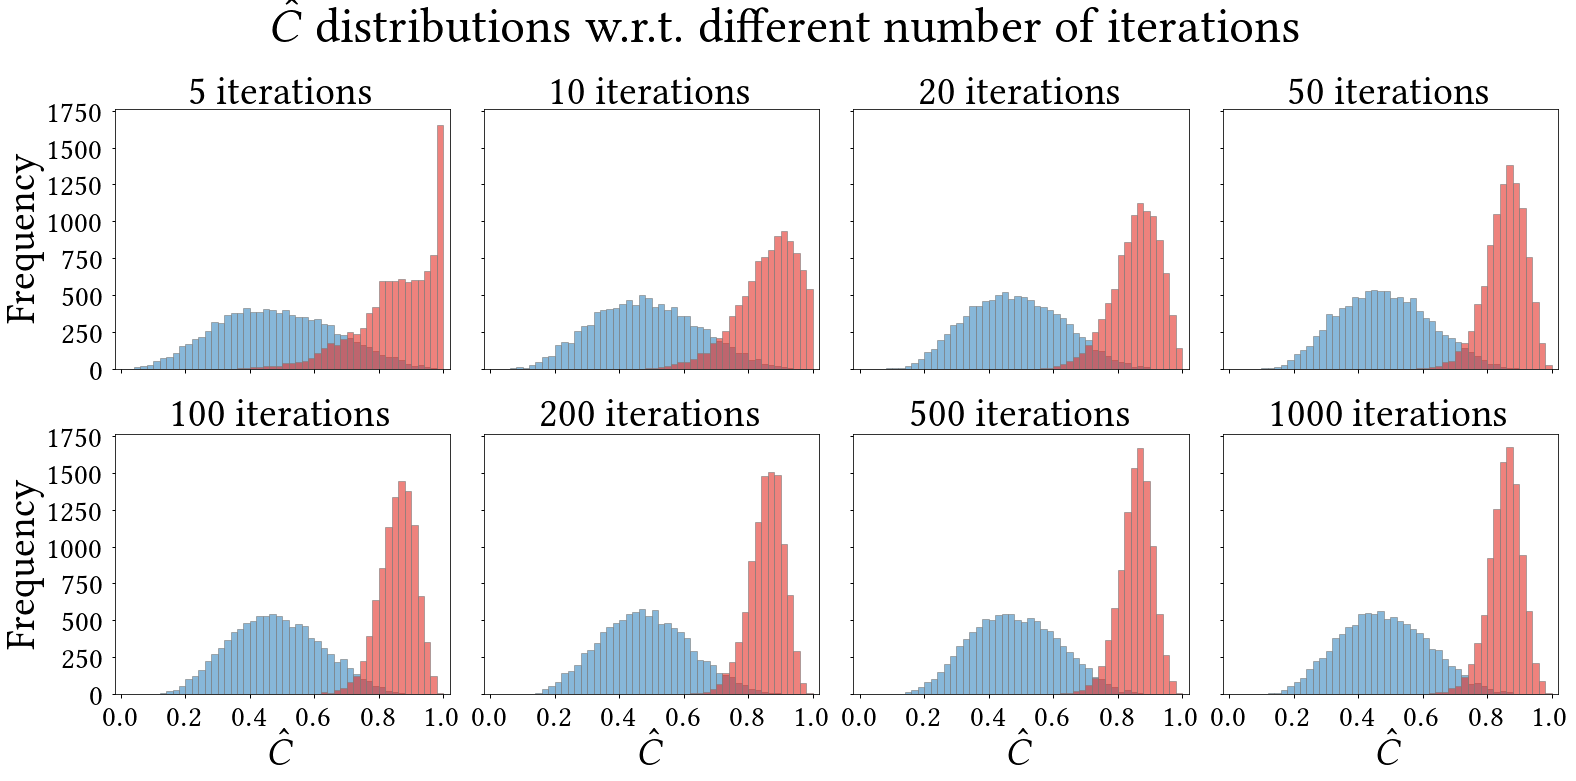

In [69]:
compare(0.5)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


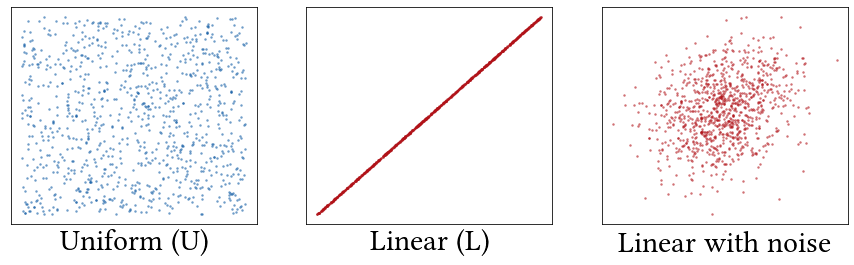

In [61]:
f, axarr = plt.subplots(1,3, figsize=(15,4))
axes = axarr.flatten()
labelsize = 30

def sub(data, name, i, color):
  plt.sca(axes[i])
  ax = plt.gca()
  xs = data["1"].to_numpy()
  ys = data["2"].to_numpy()
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
  ax.scatter(xs, ys, s = 4, c = color, alpha = 0.6)
  plt.title(name, y=-0.15, fontsize = labelsize)

sub(data_u, "Uniform (U)" ,0, blues5[0])
sub(data_l, "Linear (L)", 1, reds5[0])
sub(data_l_noise, "Linear with noise", 2, reds5[0])

plt.savefig("dependencies_for_DistrAC", bbox_inches='tight')